In [17]:
from glob import glob
import numpy as np
import rasterio as rio
import os
import pandas as pd
import matplotlib.pyplot as plt

# Importing dataset

In [2]:
root = '.\\steel defect'

In [3]:
images = glob(os.path.join(root, "images", '*.jpg'))

In [4]:
dataset = pd.read_csv('steel defect\\train.csv')


In [5]:
X = []
y = []
for index in range(dataset.shape[0]):
    for i in images:
        image_name = os.path.basename(i)
        if image_name!=dataset['ImageId'].iloc[index]:
            continue
        with rio.open(i, 'r') as f:
            X.append(f.read(1))
            y.append(int(dataset['ClassId'].iloc[index]))
        break  

C:\Users\Mihir\anaconda3\lib\site-packages\rasterio\__init__.py:228: NotGeoreferencedWarning: Dataset has no geotransform, gcps, or rpcs. The identity matrix be returned.
  s = DatasetReader(path, driver=driver, sharing=sharing, **kwargs)


# Stack data

In [6]:
X = np.stack(X)
y = np.array(y)

# Flatten image array

In [7]:
n_samples = X.shape[0]
X_data = X.reshape((n_samples, -1))

# Data normalization

In [8]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_data = sc.fit_transform(X_data)

3.0    2258
1.0     393
4.0     341
2.0     107
Name: ClassId, dtype: int64

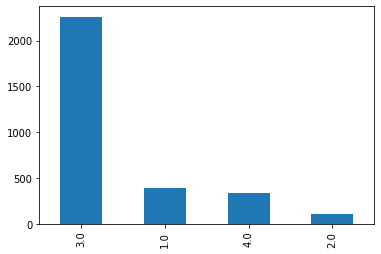

In [10]:
dataset.shape
dataset["ClassId"].value_counts().plot(kind = 'bar')
dataset["ClassId"].value_counts()

# Clssified Image Search

image of defect class 3


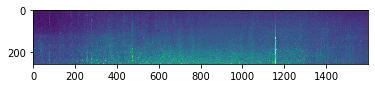

In [72]:
for i in range (len(y)):
    j=3
    if y[i]==j:
        plt.imshow(X[i])
        print("image of defect class",j)
        break

# <span style="color:red;">CNN classifier</span>

In [15]:
import matplotlib.pyplot as plt
import keras
import tensorflow as tf
from tqdm import tqdm
import cv2
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical
from keras import Sequential
from keras.layers import Dense,Conv2D,Flatten,MaxPooling2D,Dropout

Using TensorFlow backend.


# Image argumantation

In [13]:

l1=[]
l2=[] 
for ImageId,ClassId,EncodedPixels in tqdm(dataset.values):
    image=cv2.imread("steel defect\\images/{}".format(ImageId),cv2.IMREAD_COLOR)
    if image is not None:
        image=cv2.resize(image,dsize=(120,120))
        l1.append(image)
        l2.append(ClassId)

    

100%|█████████████████████████████████████████████████████████████████████████████| 6014/6014 [00:24<00:00, 240.63it/s]


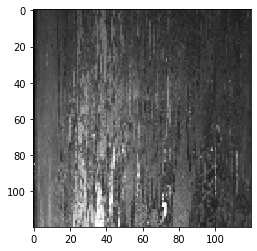

In [14]:
i = 15
plt.imshow(l1[i])

In [15]:
print(len(l1))

3099


In [16]:
encoder = LabelEncoder()
X= np.array(l1)
X = X/255
y = encoder.fit_transform(l2)
y = to_categorical(y)

# Split the dataset into train and test

In [17]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [18]:
print("x_train shape:",X_train.shape)
print("x_test shape:",X_test.shape)
print("y_train shape:",y_train.shape)
print("y_test shape:",y_test.shape)

x_train shape: (2479, 120, 120, 3)
x_test shape: (620, 120, 120, 3)
y_train shape: (2479, 4)
y_test shape: (620, 4)


In [71]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(120,120,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(3,3)))
model.add(Conv2D(64,(3,3),activation="relu"))
model.add(MaxPooling2D(pool_size=(4,4)))
model.add(Flatten())
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(128,activation="relu"))
model.add(Dropout(0.3))
model.add(Dense(256,activation="relu"))
model.add(Dense(4,activation="softmax"))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 118, 118, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 39, 39, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 37, 37, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 12, 12, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        36928     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 2, 2, 64)          0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 256)              

In [20]:
early_stopping = tf.keras.callbacks.EarlyStopping(patience=5,min_delta=0.001,restore_best_weights=True)

In [21]:
model.compile(loss=keras.losses.categorical_crossentropy,optimizer=keras.optimizers.Adam(),metrics=["accuracy"])

In [22]:
history = model.fit(X_train,y_train,epochs=15,validation_data=(X_test,y_test),batch_size=128,verbose=1, callbacks=[early_stopping])

Train on 2479 samples, validate on 620 samples
Epoch 1/15
2479/2479 [==============================] - 12s 5ms/step - loss: 0.9739 - accuracy: 0.6967 - val_loss: 0.8725 - val_accuracy: 0.7194
Epoch 2/15
2479/2479 [==============================] - 11s 5ms/step - loss: 0.8487 - accuracy: 0.7309 - val_loss: 0.8424 - val_accuracy: 0.7194
Epoch 3/15
2479/2479 [==============================] - 10s 4ms/step - loss: 0.8179 - accuracy: 0.7309 - val_loss: 0.7979 - val_accuracy: 0.7194
Epoch 4/15
2479/2479 [==============================] - 10s 4ms/step - loss: 0.7928 - accuracy: 0.7309 - val_loss: 0.7710 - val_accuracy: 0.7194
Epoch 5/15
2479/2479 [==============================] - 11s 4ms/step - loss: 0.7776 - accuracy: 0.7330 - val_loss: 0.7464 - val_accuracy: 0.7484
Epoch 6/15
2479/2479 [==============================] - 10s 4ms/step - loss: 0.7469 - accuracy: 0.7463 - val_loss: 0.7135 - val_accuracy: 0.7484
Epoch 7/15
2479/2479 [==============================] - 10s 4ms/step - loss: 0.7227

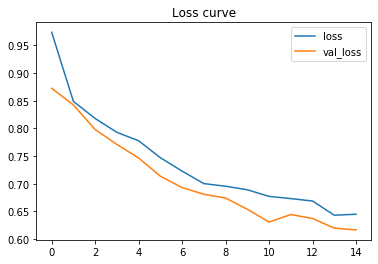

In [23]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

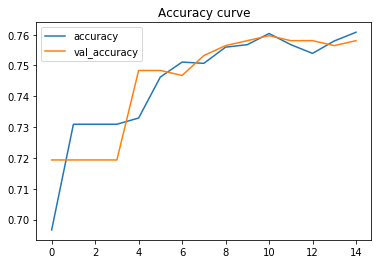

In [24]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [25]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

620/620 [==============================] - 1s 1ms/step
[+] Accuracy: 75.81%


# <span style="color:red;">Xception</span>

In [26]:
from keras.models import Model
from keras.layers import GlobalAveragePooling2D, Dense, Conv2D, BatchNormalization, Dropout

In [27]:
# Image argumantation
l1=[]
l2=[] 
for ImageId,ClassId,EncodedPixels in tqdm(dataset.values):
    image=cv2.imread("steel defect\\images/{}".format(ImageId),cv2.IMREAD_COLOR)
    if image is not None:
        image=cv2.resize(image,dsize=(120,120))
        l1.append(image)
        l2.append(ClassId)

100%|█████████████████████████████████████████████████████████████████████████████| 6014/6014 [00:14<00:00, 404.67it/s]


In [28]:
encoder = LabelEncoder()
X= np.array(l1)
X = X/255
y = encoder.fit_transform(l2)
y = to_categorical(y)

# Split the dataset into train and test

In [29]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=1)

In [30]:
Classification_Model = keras.applications.xception.Xception(include_top = False, input_shape = (120,120,3))

layer = Classification_Model.output
layer = GlobalAveragePooling2D()(layer)

layer = Dense(1024, activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = Dropout(0.3)(layer)

layer = Dense(512, activation='relu')(layer)
layer = BatchNormalization()(layer)
layer = Dropout(0.3)(layer)

layer = Dense(64, activation='relu')(layer)
predictions = Dense(4, activation='softmax')(layer)
model = Model(inputs=Classification_Model.input, outputs=predictions)
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 120, 120, 3)  0                                            
__________________________________________________________________________________________________
block1_conv1 (Conv2D)           (None, 59, 59, 32)   864         input_1[0][0]                    
__________________________________________________________________________________________________
block1_conv1_bn (BatchNormaliza (None, 59, 59, 32)   128         block1_conv1[0][0]               
__________________________________________________________________________________________________
block1_conv1_act (Activation)   (None, 59, 59, 32)   0           block1_conv1_bn[0][0]            
____________________________________________________________________________________________

In [31]:
model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['accuracy'])
history = model.fit(X_train,y_train,epochs=30,validation_data=(X_test,y_test),batch_size=128,verbose=1)

Train on 2479 samples, validate on 620 samples
Epoch 1/30
2479/2479 [==============================] - 592s 239ms/step - loss: 0.3793 - accuracy: 0.8471 - val_loss: 0.6396 - val_accuracy: 0.8597
Epoch 2/30
2479/2479 [==============================] - 667s 269ms/step - loss: 0.2309 - accuracy: 0.9006 - val_loss: 0.9183 - val_accuracy: 0.8597
Epoch 3/30
2479/2479 [==============================] - 643s 259ms/step - loss: 0.1737 - accuracy: 0.9293 - val_loss: 0.4727 - val_accuracy: 0.8681
Epoch 4/30
2479/2479 [==============================] - 645s 260ms/step - loss: 0.1360 - accuracy: 0.9428 - val_loss: 0.4945 - val_accuracy: 0.8589
Epoch 5/30
2479/2479 [==============================] - 672s 271ms/step - loss: 0.1034 - accuracy: 0.9586 - val_loss: 0.3682 - val_accuracy: 0.8710
Epoch 6/30
2479/2479 [==============================] - 681s 275ms/step - loss: 0.0949 - accuracy: 0.9630 - val_loss: 0.3520 - val_accuracy: 0.8794
Epoch 7/30
2479/2479 [==============================] - 635s 256m

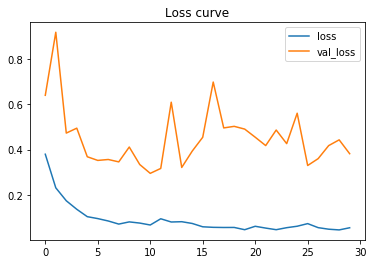

In [32]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['loss', 'val_loss']].plot(title = 'Loss curve')

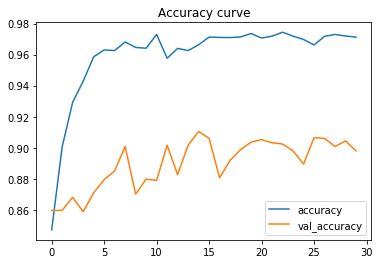

In [33]:
history_df = pd.DataFrame(history.history)
history_df.loc[:, ['accuracy', 'val_accuracy']].plot(title = 'Accuracy curve')

In [34]:
result = model.evaluate(X_test, y_test)

loss = result[0]
accuracy = result[1]
print(f"[+] Accuracy: {accuracy*100:.2f}%")

620/620 [==============================] - 37s 60ms/step
[+] Accuracy: 89.80%


# Accuracy Bar Chart

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns

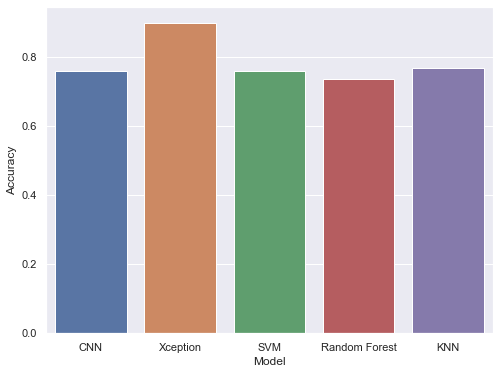

In [5]:
accuracy=[0.7581,0.8980,0.7580,0.7338,0.7661]
labels=['CNN','Xception','SVM','Random Forest','KNN']

sns.set(rc={'figure.figsize':(8,6)})
ax = sns.barplot(x=labels, y=accuracy)
ax.set(xlabel='Model', ylabel='Accuracy')
plt.show()